In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import glob
import dm_tools
import numpy as np
import seaborn as sns
from scipy import stats
sns.set(style="ticks")
#import statsmodels.api as sm
import pandas as pd
%matplotlib inline
plt.rc('text',usetex=True)
plt.rc('lines',linewidth=1)
plt.rc('legend',fontsize=10)
plt.rc('mathtext',fontset='cm')
plt.rc('font',**{'family':'serif','serif':['Helvetica'],'size':10})


/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#New code to pick-out configurations with the chosen charge configurations
#Also contains code (generate_df_force) to force various parameter to be equal if desired (i.e., U=U', etc.)

import json
dat=json.load(open("cr_data_lucas.json"))
#for d in dat:
#  print(d['atom'],d['qmc']['dmc']['postprocess'])

def generate_df(data):
  keys=['atom','energy','error','Nd','Ne','Sz','e','U','Uprime','J','Constant','Epsilon']
  df={}
  for k in keys:
    df[k]=[]
    
  for d in data:
   if 'postprocess' in d['qmc']['dmc'].keys():

    fill=d['filling']
    sz=len(fill[0])-len(fill[1])

    nd=0
    ne=0
    for i in range(6,11):
      if fill[0].count(i) > 0 and fill[1].count(i) > 0:
        nd+=1
      ne+=fill[0].count(i)+fill[1].count(i)
#    print('Fill,Sz,Nd')
#    print(fill,sz,nd)

    obdm=d['qmc']['dmc']['postprocess'][0]['results']['properties']['tbdm_basis']['obdm']
    tbdm=d['qmc']['dmc']['postprocess'][0]['results']['properties']['tbdm_basis']['tbdm']

    ####Energy

    eterm=0
    for i in range(1,6):
      for s in ['up','down']:
        #print(obdm[s][i][i])
        eterm+=obdm[s][i][i]
    
    uterm=0
    for i in range(1,6):
      uterm+=tbdm['updown'][i][i][i][i]
    
#    for i in range(1,6):
#      for j in range(i+1,6):
#        for s in ['updown','upup','downdown']:
          #print(s,tbdm[s][i][j][i][j])
#          upterm+=tbdm[s][i][j][i][j]
#    df['Uprime'].append(upterm)

    upterm=0
#This is the first uprime term in Georges' expression
    for i in range(1,6):
        for j in range(1,6):
            if (i!=j):
                upterm+=tbdm['updown'][i][j][i][j]
#This is the second uprime term in Georges' expression
    for i in range(1,6):
      for j in range(i+1,6):
        for s in ['upup','downdown']:
            #print(s,tbdm[s][i][j][i][j])
          upterm+=tbdm[s][i][j][i][j]

        
    jterm=0
    for i in range(1,6):
      for j in range(1,6):
          jterm+=0.5*tbdm['upup'][i][j][j][i]
          jterm+=0.5*tbdm['downdown'][i][j][j][i]
          if i!=j:    
            jterm+=tbdm['updown'][i][j][j][i]
            jterm+=tbdm['downup'][i][i][j][j]

    trace=0
    for i in range(1,6):
      trace+=obdm['up'][i][i]+obdm['down'][i][i]
    

#    for i in range(1,6):
#      for j in range(i+1,6):
#        for s in ['upup','downdown']:
#          jterm-=tbdm[s][i][j][i][j]
#    for i in range(1,6):
#      for j in range(1,6):
#        if i!=j:
#          jterm-=tbdm['downup'][i][j][j][i] \
#                 +tbdm['updown'][j][j][i][i] \
#                 +tbdm['updown'][i][j][j][i] \
#                 +tbdm['downup'][j][j][i][i]

    if (d['atom']=='V') or (d['atom']=='Cr' and (ne==3 or ne==4 or ne==5)) or (d['atom']=='Mn'):
      df['J'].append(jterm)
      df['Epsilon'].append(trace)
      df['Uprime'].append(upterm)
      df['U'].append(uterm)
      df['e'].append(eterm)
      df['Constant'].append(1.0)
      df['Nd'].append(nd)
      df['Ne'].append(ne)
      df['atom'].append(d['atom'])
      df['energy'].append(d['qmc']['dmc']['results'][0]['results']['properties']['total_energy']['value'][0])
      df['error'].append(d['qmc']['dmc']['results'][0]['results']['properties']['total_energy']['error'][0])
      df['Sz'].append(sz)


#  print(df['U'])
  return pd.DataFrame(df)

def generate_df_force(data):
  keys=['atom','energy','error','Nd','Ne','Sz','e','U','Uprime','J','Constant','Epsilon']
  df={}
  for k in keys:
    df[k]=[]
    
  for d in data:
   if 'postprocess' in d['qmc']['dmc'].keys():

    fill=d['filling']
    sz=len(fill[0])-len(fill[1])

    nd=0
    ne=0
    for i in range(6,11):
      if fill[0].count(i) > 0 and fill[1].count(i) > 0:
        nd+=1
      ne+=fill[0].count(i)+fill[1].count(i)
    #print(fill,nd)

    obdm=d['qmc']['dmc']['postprocess'][0]['results']['properties']['tbdm_basis']['obdm']
    tbdm=d['qmc']['dmc']['postprocess'][0]['results']['properties']['tbdm_basis']['tbdm']

    ####Energy

    eterm=0
    for i in range(1,6):
      for s in ['up','down']:
        #print(obdm[s][i][i])
        eterm+=obdm[s][i][i]
    
    uterm=0
    for i in range(1,6):
      uterm+=tbdm['updown'][i][i][i][i]
    
#    for i in range(1,6):
#      for j in range(i+1,6):
#        for s in ['updown','upup','downdown']:
          #print(s,tbdm[s][i][j][i][j])
#          upterm+=tbdm[s][i][j][i][j]
#    df['Uprime'].append(upterm)

    upterm=0
#This is the first uprime term in Georges' expression
    for i in range(1,6):
        for j in range(1,6):
            if (i!=j):
                upterm+=tbdm['updown'][i][j][i][j]
#This is the second uprime term in Georges' expression
    for i in range(1,6):
      for j in range(i+1,6):
        for s in ['upup','downdown']:
            #print(s,tbdm[s][i][j][i][j])
          upterm+=tbdm[s][i][j][i][j]

        
    jterm=0
    for i in range(1,6):
      for j in range(1,6):
          jterm+=0.5*tbdm['upup'][i][j][j][i]
          jterm+=0.5*tbdm['downdown'][i][j][j][i]
          if i!=j:    
            jterm+=tbdm['updown'][i][j][j][i]
            jterm+=tbdm['downup'][i][i][j][j]

    trace=0
    for i in range(1,6):
      trace+=obdm['up'][i][i]+obdm['down'][i][i]
    

#    for i in range(1,6):
#      for j in range(i+1,6):
#        for s in ['upup','downdown']:
#          jterm-=tbdm[s][i][j][i][j]
#    for i in range(1,6):
#      for j in range(1,6):
#        if i!=j:
#          jterm-=tbdm['downup'][i][j][j][i] \
#                 +tbdm['updown'][j][j][i][i] \
#                 +tbdm['updown'][i][j][j][i] \
#                 +tbdm['downup'][j][j][i][i]

    if (d['atom']=='V') or (d['atom']=='Cr' and (ne==3 or ne==4 or ne==5)) or (d['atom']=='Mn'):
      df['J'].append(jterm)
      df['Epsilon'].append(trace)
      df['Uprime'].append(upterm)
#      df['Uprime'].append(uterm+upterm) #This line is used to force U=U'. Take it out if you're not doing this!!
#      df['U'].append(uterm)
      df['U'].append(uterm+upterm) #This line is used to force U=U'. Take it out if you're not doing this!
      df['e'].append(eterm)
      df['Constant'].append(1.0)
      df['Nd'].append(nd)
      df['Ne'].append(ne)
      df['atom'].append(d['atom'])
      df['energy'].append(d['qmc']['dmc']['results'][0]['results']['properties']['total_energy']['value'][0])
      df['error'].append(d['qmc']['dmc']['results'][0]['results']['properties']['total_energy']['error'][0])
      df['Sz'].append(sz)


#  print(df['U'])
  return pd.DataFrame(df)


def generate_df_coury(data):
  keys=['atom','energy','error','Nd','Ne','Sz','e','U','Uprime','J','Constant','Epsilon']
  df={}
  for k in keys:
    df[k]=[]
    
  for d in data:
   if 'postprocess' in d['qmc']['dmc'].keys():

    fill=d['filling']
    sz=len(fill[0])-len(fill[1])

    nd=0
    ne=0
    for i in range(6,11):
      if fill[0].count(i) > 0 and fill[1].count(i) > 0:
        nd+=1
      ne+=fill[0].count(i)+fill[1].count(i)
    #print(fill,nd)

    obdm=d['qmc']['dmc']['postprocess'][0]['results']['properties']['tbdm_basis']['obdm']
    tbdm=d['qmc']['dmc']['postprocess'][0]['results']['properties']['tbdm_basis']['tbdm']

    ####Energy

    eterm=0
    for i in range(1,6):
      for s in ['up','down']:
        #print(obdm[s][i][i])
        eterm+=obdm[s][i][i]
    
    uterm=0
    for i in range(1,6):
      uterm+=tbdm['updown'][i][i][i][i]
    
#    for i in range(1,6):
#      for j in range(i+1,6):
#        for s in ['updown','upup','downdown']:
          #print(s,tbdm[s][i][j][i][j])
#          upterm+=tbdm[s][i][j][i][j]
#    df['Uprime'].append(upterm)

    upterm=0
#This is the first uprime term in Georges' expression
    for i in range(1,6):
        for j in range(1,6):
            if (i!=j):
                upterm+=tbdm['updown'][i][j][i][j]
#This is the second uprime term in Georges' expression
    for i in range(1,6):
      for j in range(i+1,6):
        for s in ['upup','downdown']:
            #print(s,tbdm[s][i][j][i][j])
          upterm+=tbdm[s][i][j][i][j]

        
    jterm=0
    for i in range(1,6):
      for j in range(1,6):
        for s in ['upup','downdown','updown','downup']:
          if i!=j:
            jterm+=0.5*tbdm[s][i][j][j][i]

    trace=0
    for i in range(1,6):
      trace+=obdm['up'][i][i]+obdm['down'][i][i]
    

#    for i in range(1,6):
#      for j in range(i+1,6):
#        for s in ['upup','downdown']:
#          jterm-=tbdm[s][i][j][i][j]
#    for i in range(1,6):
#      for j in range(1,6):
#        if i!=j:
#          jterm-=tbdm['downup'][i][j][j][i] \
#                 +tbdm['updown'][j][j][i][i] \
#                 +tbdm['updown'][i][j][j][i] \
#                 +tbdm['downup'][j][j][i][i]

    if (d['atom']=='V') or (d['atom']=='Cr' and (ne==3 or ne==4 or ne==5)) or (d['atom']=='Mn'):
      df['J'].append(jterm)
      df['Epsilon'].append(trace)
      df['Uprime'].append(upterm)
      df['U'].append(uterm)
      df['e'].append(eterm)
      df['Constant'].append(1.0)
      df['Nd'].append(nd)
      df['Ne'].append(ne)
      df['atom'].append(d['atom'])
      df['energy'].append(d['qmc']['dmc']['results'][0]['results']['properties']['total_energy']['value'][0])
      df['error'].append(d['qmc']['dmc']['results'][0]['results']['properties']['total_energy']['error'][0])
      df['Sz'].append(sz)


#  print(df['U'])
  return pd.DataFrame(df)

def generate_dfjj(data):
  keys=['atom','energy','error','Nd','Ne','Sz','e','U','Uprime','J','Jprime','Constant','Epsilon']
  df={}
  for k in keys:
    df[k]=[]
    
  for d in data:
   if 'postprocess' in d['qmc']['dmc'].keys():

    fill=d['filling']
    sz=len(fill[0])-len(fill[1])

    nd=0
    ne=0
    for i in range(6,11):
      if fill[0].count(i) > 0 and fill[1].count(i) > 0:
        nd+=1
      ne+=fill[0].count(i)+fill[1].count(i)
    #print(fill,nd)

    obdm=d['qmc']['dmc']['postprocess'][0]['results']['properties']['tbdm_basis']['obdm']
    tbdm=d['qmc']['dmc']['postprocess'][0]['results']['properties']['tbdm_basis']['tbdm']

    ####Energy

    eterm=0
    for i in range(1,6):
      for s in ['up','down']:
        #print(obdm[s][i][i])
        eterm+=obdm[s][i][i]
    
    uterm=0
    for i in range(1,6):
      uterm+=tbdm['updown'][i][i][i][i]
    
#    for i in range(1,6):
#      for j in range(i+1,6):
#        for s in ['updown','upup','downdown']:
          #print(s,tbdm[s][i][j][i][j])
#          upterm+=tbdm[s][i][j][i][j]
#    df['Uprime'].append(upterm)

    upterm=0
#This is the first uprime term in Georges' expression
    for i in range(1,6):
        for j in range(1,6):
            if (i!=j):
                upterm+=tbdm['updown'][i][j][i][j]
#This is the second uprime term in Georges' expression
    for i in range(1,6):
      for j in range(i+1,6):
        for s in ['upup','downdown']:
            #print(s,tbdm[s][i][j][i][j])
          upterm+=tbdm[s][i][j][i][j]

        
    jterm=0
    for i in range(1,6):
      for j in range(1,6):
          jterm+=0.5*tbdm['upup'][i][j][j][i]
          jterm+=0.5*tbdm['downdown'][i][j][j][i]
          if i!=j:    
            jterm+=tbdm['updown'][i][j][j][i]
            
    jpterm=0
    for i in range(1,6):
      for j in range(1,6):
          if i!=j:    
            jpterm+=tbdm['downup'][i][i][j][j]
            

    trace=0
    for i in range(1,6):
      trace+=obdm['up'][i][i]+obdm['down'][i][i]
    

#    for i in range(1,6):
#      for j in range(i+1,6):
#        for s in ['upup','downdown']:
#          jterm-=tbdm[s][i][j][i][j]
#    for i in range(1,6):
#      for j in range(1,6):
#        if i!=j:
#          jterm-=tbdm['downup'][i][j][j][i] \
#                 +tbdm['updown'][j][j][i][i] \
#                 +tbdm['updown'][i][j][j][i] \
#                 +tbdm['downup'][j][j][i][i]

    if (d['atom']=='V') or (d['atom']=='Cr' and (ne==3 or ne==4 or ne==5)) or (d['atom']=='Mn'):
      df['J'].append(jterm)
      df['Jprime'].append(jpterm)
      df['Epsilon'].append(trace)
      df['Uprime'].append(upterm)
      df['U'].append(uterm)
      df['e'].append(eterm)
      df['Constant'].append(1.0)
      df['Nd'].append(nd)
      df['Ne'].append(ne)
      df['atom'].append(d['atom'])
      df['energy'].append(d['qmc']['dmc']['results'][0]['results']['properties']['total_energy']['value'][0])
      df['error'].append(d['qmc']['dmc']['results'][0]['results']['properties']['total_energy']['error'][0])
      df['Sz'].append(sz)

  return pd.DataFrame(df) 

dater_luc=generate_df(dat)
dater_luc_force=generate_df_force(dat)

#c=0
#for i in df['U']:
#  print(27.2114*df['U'][c])
#  c+=1

def fit_dataframe(parameters,df):
  nparms=len(parameters)
  npts=len(df)
  A=np.zeros((npts,nparms))
  for i,p in enumerate(parameters):
    A[:,i]=np.array(df[p])
  K=np.array(df['energy'])
  x,res,rank,s=np.linalg.lstsq(A,K)
  K_mod=np.dot(A,x)
#  print(A)
#  print(K)
  Kerr=np.array(df['error'])
  return x,res,K,Kerr,K_mod


def plot_pair(pvals,parms,df,ax,pair,rangex,rangey,fsize=16):
  ev=27.2114
  x=pair[0]
  y=pair[1]
  xn=parms[x]
  yn=parms[y]
  print('X Range')
  print(rangex)
  print('Y Range')
  print(rangey)
  xs=np.linspace(rangex[0],rangex[1],200)
  ys=np.linspace(rangey[0],rangey[1],200)
  X,Y=np.meshgrid(xs,ys)
  xvals=np.einsum('ab,c->abc',X,df[xn])
  yvals=np.einsum('ab,c->abc',Y,df[yn])
  toterr=xvals+yvals-df['energy'][np.newaxis,np.newaxis,:]
  for i,p in enumerate(parms):
    if i!=x and i!=y:
      toterr+=pvals[i]*df[p][np.newaxis,np.newaxis,:]
  err=np.sqrt(np.sum(toterr**2,axis=2)/toterr.shape[2])
  ax.pcolor(ev*X,ev*Y,ev*err,cmap='autumn')
  
  CS=ax.contour(ev*X,ev*Y,ev*err,color='k')  
  ax.clabel(CS,inline=1,fontsize=10,color='k')
  
  ax.set_xlabel(xn+"(eV)",fontsize=fsize)
  ax.set_ylabel(yn+"(eV)",fontsize=fsize)


print('Done')

Done


In [8]:
#Produce energy-energy fit plots for all atoms using all data, grouping fits together (E0-Eps-U-U'-J Model)

dater_luc=generate_df(dat)

tog=pd.load("Data1.pkl")

groups=dater_luc.groupby(['atom'])

fig,axes2d=plt.subplots(2,int((len(groups)+1)/2),figsize=(10.,6.))
axes=axes2d.flatten()

count=0
pcount=1
evc=27.2114

#f1 = plt.figure(1)
#f2 = plt.figure(2)
#f3 = plt.figure(3)

for name, group in groups:
#  if group['atom'].any()=='V' or group['atom'].any()=='Mn':
#    print('yes')
    
  print(name)
  #  print(group)
  #  x=fit_dataframe(['E0','U','Uprime','J'],group()
  paramers=['Constant','Epsilon','U','Uprime','J']
  x=fit_dataframe(paramers,group)

  #  print(x)
  #  print('x')
  #  print(x)
  #  print(x,27.2114*res)
  print(group.sort('energy').head(100).to_string())
#  print(group.head(100).to_string())

    
  cc=0
  for k in paramers:
    print(k)
    print(x[0][cc]*evc)
    cc+=1

  natom = len(group['Constant'])
  print('Residual (eV)')
  print(np.sqrt(x[1][0]/natom)*evc)

  E_ab=x[2]
  E_err=x[3]
  E_mod=x[4]

#  plt.figure(pcount)
  set=0.1
  print('Ab-Initio Energies')
  print(E_ab)
  print('Model Energies')
  print(E_mod)

  axes[count].errorbar(E_mod, E_ab, yerr=E_err, linestyle="",lw=1,marker="o",markersize=3,mew=2)
  axes[count].plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)

  #plt.plot([-100,-2],[-100,-2],lw=2)
  axes[count].set_xlim([np.min(E_mod)-set, np.max(E_mod)+set])
  axes[count].set_ylim([np.min(E_ab)-set, np.max(E_ab)+set])

#  plt.gcf().tight_layout()
#  plt.savefig('atomfit'+str(pcount)+'.jpg')
#  pcount+=1
  fsize=10
  axes[count].set_xlabel("Model Energy (Hartree)",fontsize=fsize)
  axes[count].set_ylabel("Ab-Initio Energy (Hartree)",fontsize=fsize)
  axes[count].set_title(name[0])
  plt.setp(axes[count].get_xticklabels(), rotation=40, horizontalalignment='right')
  count+=1
    

  #print(group)
  #print(group.corr())
#  if len(group)>=3:
#    print(fit_dataframe(['e','U'],group))
#  if len(group)>=5:
#    print(fit_dataframe(['e','U','Uprime'],group))
#    print(fit_dataframe(['e','U','J','Uprime'],group))
#  print(group)

plt.tick_params(axis='both', which='major', labelsize=3)
plt.tick_params(axis='both', which='minor', labelsize=3)
plt.tight_layout()


Cr
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
12         1  4.969536 -9.791556   0   5   5  0.029671  9.880303   Cr  4.969536 -86.908664  0.000942
10         1  3.976095 -5.936659   0   4   4  0.023404  6.021929   Cr  3.976095 -86.856092  0.000804
22         1  4.959508 -5.908768   0   5   3  0.013591  9.814867   Cr  4.959508 -86.824838  0.000790
13         1  4.931521 -5.860724   1   5   3  0.985051  8.779628   Cr  4.931521 -86.777536  0.000843
11         1  3.968669 -2.875428   0   4   2  0.010849  5.907844   Cr  3.968669 -86.771255  0.000829
18         1  4.944792 -4.044485   0   5   1  0.002339  9.851370   Cr  4.944792 -86.766624  0.000866
21         1  3.950593 -1.964099   0   4   0  0.024300  5.897068   Cr  3.950593 -86.751986  0.000810
19         1  4.965288 -4.001193   1   5   1  0.982730  8.716152   Cr  4.965288 -86.731685  0.000788
23         1  3.957958 -2.956977   1   4   2  0.984297  4.928640   Cr  3.957958 -86.6846

In [42]:
#Produce energy-energy fit plots, grouping fits together (E0-J Model)

dater_luc=generate_df(dat)

tog=pd.load("Data1.pkl")

groups=dater_luc.groupby(['atom','Ne'])

fig,axes2d=plt.subplots(2,int((len(groups)+1)/2),figsize=(10.,6.))
axes=axes2d.flatten()

count=0
pcount=1
evc=27.2114

#f1 = plt.figure(1)
#f2 = plt.figure(2)
#f3 = plt.figure(3)

for name, group in groups:
#  if group['atom'].any()=='V' or group['atom'].any()=='Mn':
#    print('yes')
    
  print(name)
  #  print(group)
  #  x=fit_dataframe(['E0','U','Uprime','J'],group()
  paramers=['Constant','J']
  x=fit_dataframe(paramers,group)

  #  print(x)
  #  print('x')
  #  print(x)
  #  print(x,27.2114*res)
  print(group.sort('Sz').head(100).to_string())
#  print(group.head(100).to_string())

    
  cc=0
  for k in paramers:
    print(k)
    print(x[0][cc]*evc)
    cc+=1

  natom = len(group['Constant'])
#  print('Residual (eV)')
#  print(np.sqrt(x[1][0]/natom)*evc)

  E_ab=x[2]
  E_err=x[3]
  E_mod=x[4]

#  plt.figure(pcount)
  set=0.1
  print('Ab-Initio Energies')
  print(E_ab)
  print('Model Energies')
  print(E_mod)

  axes[count].errorbar(E_mod, E_ab, yerr=E_err, linestyle="",lw=1,marker="o",markersize=3,mew=2)
  axes[count].plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)

  #plt.plot([-100,-2],[-100,-2],lw=2)
  axes[count].set_xlim([np.min(E_mod)-set, np.max(E_mod)+set])
  axes[count].set_ylim([np.min(E_ab)-set, np.max(E_ab)+set])

#  plt.gcf().tight_layout()
#  plt.savefig('atomfit'+str(pcount)+'.jpg')
#  pcount+=1
  fsize=10
  axes[count].set_xlabel("Model Energy (Hartree)",fontsize=fsize)
  axes[count].set_ylabel("Ab-Initio Energy (Hartree)",fontsize=fsize)
  axes[count].set_title(name[0]+str(name[1]))
  plt.setp(axes[count].get_xticklabels(), rotation=40, horizontalalignment='right')
  count+=1
    

  #print(group)
  #print(group.corr())
#  if len(group)>=3:
#    print(fit_dataframe(['e','U'],group))
#  if len(group)>=5:
#    print(fit_dataframe(['e','U','Uprime'],group))
#    print(fit_dataframe(['e','U','J','Uprime'],group))
#  print(group)

plt.tick_params(axis='both', which='major', labelsize=3)
plt.tick_params(axis='both', which='minor', labelsize=3)
plt.tight_layout()
plt.savefig("J_Only_Fit.pdf")



(u'Cr', 3)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
16         1  2.980262 -0.994732   1   3   1  0.969154  2.025396   Cr  2.980262 -86.244576  0.000816
17         1  2.972865 -1.008477   0   3   1  0.004076  2.937660   Cr  2.972865 -86.301106  0.000819
20         1  2.935212 -2.895244   0   3   3  0.001105  3.006798   Cr  2.935212 -86.355270  0.000655
Constant
-2346.41125471
J
1.1888655938
Ab-Initio Energies
[-86.2445765  -86.30110582 -86.35526974]
Model Energies
[-86.27243941 -86.27303993 -86.35547272]
(u'Cr', 4)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
9          1  3.967939 -1.868528   1   4   0  0.991735  5.044862   Cr  3.967939 -86.680358  0.000831
15         1  3.974263 -1.938829   2   4   0  1.965035  3.899048   Cr  3.974263 -86.609841  0.000644
21         1  3.950593 -1.964099   0   4   0  0.024300  5.897068   Cr  3.950593 -86.751986  0.000810
11         1  3

In [56]:
#Produce energy-energy fit plots, grouping fits together, forcing U=U' by-hand in this case (E0-T Model)

dater_luc_force=generate_df_force(dat)

tog=pd.load("Data1.pkl")

groups=dater_luc_force.groupby(['atom','Ne'])

fig,axes2d=plt.subplots(2,int((len(groups)+1)/2),figsize=(10.,6.))
axes=axes2d.flatten()

count=0
pcount=1
evc=27.2114

#f1 = plt.figure(1)
#f2 = plt.figure(2)
#f3 = plt.figure(3)

for name, group in groups:
#  if group['atom'].any()=='V' or group['atom'].any()=='Mn':
#    print('yes')
    
  print(name)
  #  print(group)
  #  x=fit_dataframe(['E0','U','Uprime','J'],group()
  paramers=['Constant','U','J']
  x=fit_dataframe(paramers,group)

  #  print(x)
  #  print('x')
  #  print(x)
  #  print(x,27.2114*res)
  print(group.sort('energy').head(100).to_string())
#  print(group.head(100).to_string())

    
  cc=0
  for k in paramers:
    print(k)
    print(x[0][cc]*evc)
    cc+=1

  natom = len(group['Constant'])
#  print('Residual (eV)')
#  print(np.sqrt(x[1][0]/natom)*evc)

  E_ab=x[2]
  E_err=x[3]
  E_mod=x[4]

#  plt.figure(pcount)
  set=0.1
  print('Ab-Initio Energies')
  print(E_ab)
  print('Model Energies')
  print(E_mod)

  axes[count].errorbar(E_mod, E_ab, yerr=E_err, linestyle="",lw=1,marker="o",markersize=3,mew=2)
  axes[count].plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)

  #plt.plot([-100,-2],[-100,-2],lw=2)
  axes[count].set_xlim([np.min(E_mod)-set, np.max(E_mod)+set])
  axes[count].set_ylim([np.min(E_ab)-set, np.max(E_ab)+set])

#  plt.gcf().tight_layout()
#  plt.savefig('atomfit'+str(pcount)+'.jpg')
#  pcount+=1
  fsize=10
  axes[count].set_xlabel("Model Energy (Hartree)",fontsize=fsize)
  axes[count].set_ylabel("Ab-Initio Energy (Hartree)",fontsize=fsize)
  axes[count].set_title(name[0]+str(name[1]))
  plt.setp(axes[count].get_xticklabels(), rotation=40, horizontalalignment='right')
  count+=1
    

  #print(group)
  #print(group.corr())
#  if len(group)>=3:
#    print(fit_dataframe(['e','U'],group))
#  if len(group)>=5:
#    print(fit_dataframe(['e','U','Uprime'],group))
#    print(fit_dataframe(['e','U','J','Uprime'],group))
#  print(group)

plt.tick_params(axis='both', which='major', labelsize=3)
plt.tick_params(axis='both', which='minor', labelsize=3)
plt.tight_layout()
#plt.savefig("2UeqJ_Only_Fit.pdf")


(u'Cr', 3)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
20         1  2.935212 -2.895244   0   3   3  3.007903  3.006798   Cr  2.935212 -86.355270  0.000655
17         1  2.972865 -1.008477   0   3   1  2.941736  2.937660   Cr  2.972865 -86.301106  0.000819
16         1  2.980262 -0.994732   1   3   1  2.994550  2.025396   Cr  2.980262 -86.244576  0.000816
Constant
-2430.88530926
U
28.6609020152
J
1.78626931855
Ab-Initio Energies
[-86.2445765  -86.30110582 -86.35526974]
Model Energies
[-86.2445765  -86.30110582 -86.35526974]
(u'Cr', 4)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
10         1  3.976095 -5.936659   0   4   4  6.045333  6.021929   Cr  3.976095 -86.856092  0.000804
11         1  3.968669 -2.875428   0   4   2  5.918693  5.907844   Cr  3.968669 -86.771255  0.000829
21         1  3.950593 -1.964099   0   4   0  5.921368  5.897068   Cr  3.950593 -86.751986  0.00081

(u'Cr', 3)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
20         1  2.935212 -2.857515   0   3   3  0.001105  3.006798   Cr  2.935212 -86.355270  0.000655
17         1  2.972865 -0.967665   0   3   1  0.004076  2.937660   Cr  2.972865 -86.301106  0.000819
16         1  2.980262 -1.014948   1   3   1  0.969154  2.025396   Cr  2.980262 -86.244576  0.000816
Constant
-2346.43952971
J
1.18566659122
Ab-Initio Energies
[-86.2445765  -86.30110582 -86.35526974]
Model Energies
[-86.27424241 -86.27218215 -86.3545275 ]
(u'Cr', 4)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
10         1  3.976095 -5.897210   0   4   4  0.023404  6.021929   Cr  3.976095 -86.856092  0.000804
11         1  3.968669 -2.898714   0   4   2  0.010849  5.907844   Cr  3.968669 -86.771255  0.000829
21         1  3.950593 -2.078206   0   4   0  0.024300  5.897068   Cr  3.950593 -86.751986  0.000810
23         1  

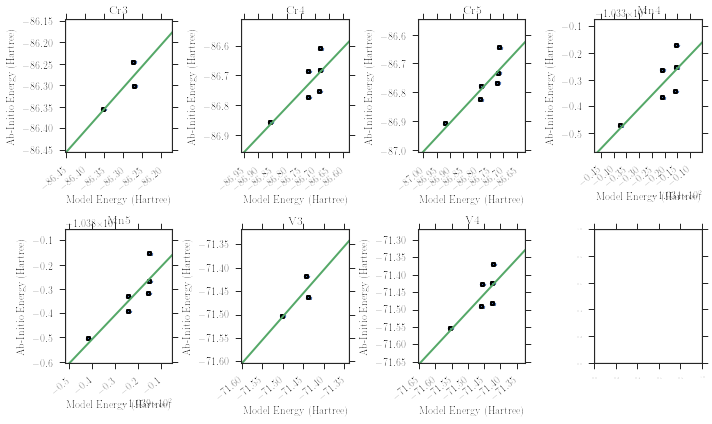

In [77]:
#Produce energy-energy fit plots, grouping fits together, using J as defined by Coury et al

dater_luc_coury=generate_df_coury(dat)

tog=pd.load("Data1.pkl")

groups=dater_luc_coury.groupby(['atom','Ne'])

fig,axes2d=plt.subplots(2,int((len(groups)+1)/2),figsize=(10.,6.))
axes=axes2d.flatten()

count=0
pcount=1
evc=27.2114

#f1 = plt.figure(1)
#f2 = plt.figure(2)
#f3 = plt.figure(3)

for name, group in groups:
#  if group['atom'].any()=='V' or group['atom'].any()=='Mn':
#    print('yes')
    
  print(name)
  #  print(group)
  #  x=fit_dataframe(['E0','U','Uprime','J'],group()
  paramers=['Constant','J']
  x=fit_dataframe(paramers,group)

  #  print(x)
  #  print('x')
  #  print(x)
  #  print(x,27.2114*res)
  print(group.sort('energy').head(100).to_string())
#  print(group.head(100).to_string())

    
  cc=0
  for k in paramers:
    print(k)
    print(x[0][cc]*evc)
    cc+=1

  natom = len(group['Constant'])
#  print('Residual (eV)')
#  print(np.sqrt(x[1][0]/natom)*evc)

  E_ab=x[2]
  E_err=x[3]
  E_mod=x[4]

#  plt.figure(pcount)
  set=0.1
  print('Ab-Initio Energies')
  print(E_ab)
  print('Model Energies')
  print(E_mod)

  axes[count].errorbar(E_mod, E_ab, yerr=E_err, linestyle="",lw=1,marker="o",markersize=3,mew=2)
  axes[count].plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)

  #plt.plot([-100,-2],[-100,-2],lw=2)
  axes[count].set_xlim([np.min(E_mod)-set, np.max(E_mod)+set])
  axes[count].set_ylim([np.min(E_ab)-set, np.max(E_ab)+set])

#  plt.gcf().tight_layout()
#  plt.savefig('atomfit'+str(pcount)+'.jpg')
#  pcount+=1
  fsize=10
  axes[count].set_xlabel("Model Energy (Hartree)",fontsize=fsize)
  axes[count].set_ylabel("Ab-Initio Energy (Hartree)",fontsize=fsize)
  axes[count].set_title(name[0]+str(name[1]))
  plt.setp(axes[count].get_xticklabels(), rotation=40, horizontalalignment='right')
  count+=1
    

  #print(group)
  #print(group.corr())
#  if len(group)>=3:
#    print(fit_dataframe(['e','U'],group))
#  if len(group)>=5:
#    print(fit_dataframe(['e','U','Uprime'],group))
#    print(fit_dataframe(['e','U','J','Uprime'],group))
#  print(group)

plt.tick_params(axis='both', which='major', labelsize=3)
plt.tick_params(axis='both', which='minor', labelsize=3)
plt.tight_layout()
plt.savefig("J_Coury_Fit.pdf")

    Constant   Epsilon         J    Jprime  Nd  Ne  Sz         U    Uprime atom         e      energy     error
0          1  3.928646 -1.994542  0.015043   1   4   0  0.968997  4.857224    V  3.928646  -71.423628  0.000787
1          1  3.945056 -5.830885  0.000177   0   4   4  0.030276  5.935117    V  3.945056  -71.552471  0.000614
2          1  3.961710 -2.964766 -0.069363   0   4   2  0.015720  5.993559    V  3.961710  -71.490823  0.000889
3          1  3.947876 -1.903553  0.011965   2   4   0  1.943432  3.872741    V  3.947876  -71.369752  0.000797
4          1  3.001733 -1.147868  0.070300   1   3   1  0.948391  2.014964    V  3.001733  -71.418006  0.000766
5          1  2.996644 -1.017136 -0.043789   0   3   1  0.028244  3.025925    V  2.996644  -71.463328  0.000688
6          1  2.991521 -3.039589 -0.027742   0   3   3  0.025993  3.059985    V  2.991521  -71.502703  0.000687
7          1  3.967184 -1.995325  0.007755   0   4   0  0.032774  5.857576    V  3.967184  -71.482296  0

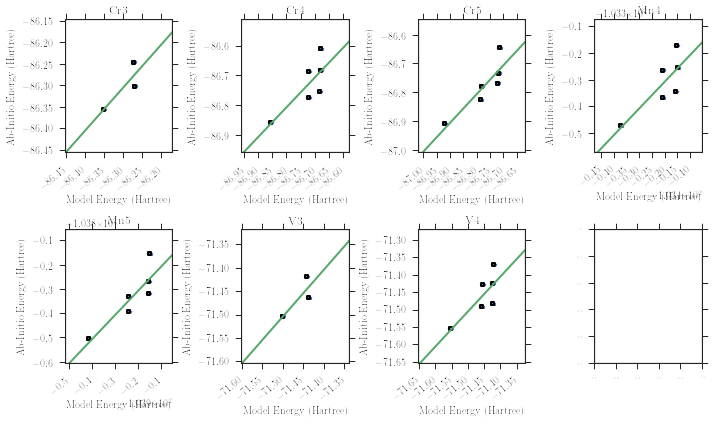

In [75]:
#Produce energy-energy fit plots, grouping fits together, using modified Georges form with a separate J and J' 

dater_luc_jj=generate_dfjj(dat)

print(dater_luc_jj)

tog=pd.load("Data1.pkl")

groups=dater_luc_jj.groupby(['atom','Ne'])

fig,axes2d=plt.subplots(2,int((len(groups)+1)/2),figsize=(10.,6.))
axes=axes2d.flatten()

count=0
pcount=1
evc=27.2114

#f1 = plt.figure(1)
#f2 = plt.figure(2)
#f3 = plt.figure(3)

for name, group in groups:
#  if group['atom'].any()=='V' or group['atom'].any()=='Mn':
#    print('yes')
    
  print(name)
  #  print(group)
  #  x=fit_dataframe(['E0','U','Uprime','J'],group()
  paramers=['Constant','J']
  x=fit_dataframe(paramers,group)

  #  print(x)
  #  print('x')
  #  print(x)
  #  print(x,27.2114*res)
  print(group.sort('energy').head(100).to_string())
#  print(group.head(100).to_string())

    
  cc=0
  for k in paramers:
    print(k)
    print(x[0][cc]*evc)
    cc+=1

  natom = len(group['Constant'])
#  print('Residual (eV)')
#  print(np.sqrt(x[1][0]/natom)*evc)

  E_ab=x[2]
  E_err=x[3]
  E_mod=x[4]

#  plt.figure(pcount)
  set=0.1
  print('Ab-Initio Energies')
  print(E_ab)
  print('Model Energies')
  print(E_mod)

  axes[count].errorbar(E_mod, E_ab, yerr=E_err, linestyle="",lw=1,marker="o",markersize=3,mew=2)
  axes[count].plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)

  #plt.plot([-100,-2],[-100,-2],lw=2)
  axes[count].set_xlim([np.min(E_mod)-set, np.max(E_mod)+set])
  axes[count].set_ylim([np.min(E_ab)-set, np.max(E_ab)+set])

#  plt.gcf().tight_layout()
#  plt.savefig('atomfit'+str(pcount)+'.jpg')
#  pcount+=1
  fsize=10
  axes[count].set_xlabel("Model Energy (Hartree)",fontsize=fsize)
  axes[count].set_ylabel("Ab-Initio Energy (Hartree)",fontsize=fsize)
  axes[count].set_title(name[0]+str(name[1]))
  plt.setp(axes[count].get_xticklabels(), rotation=40, horizontalalignment='right')
  count+=1
    

  #print(group)
  #print(group.corr())
#  if len(group)>=3:
#    print(fit_dataframe(['e','U'],group))
#  if len(group)>=5:
#    print(fit_dataframe(['e','U','Uprime'],group))
#    print(fit_dataframe(['e','U','J','Uprime'],group))
#  print(group)

plt.tick_params(axis='both', which='major', labelsize=3)
plt.tick_params(axis='both', which='minor', labelsize=3)
plt.tight_layout()
plt.savefig("J_Jp_Georges_Fit.pdf")




In [5]:
#Produce energy-energy fit plots, grouping fits together (E0-U-J Model)

tog=pd.load("Data1.pkl")

groups=dater_luc.groupby(['atom','Ne'])

fig,axes2d=plt.subplots(2,int((len(groups)+1)/2),figsize=(10.,6.))
axes=axes2d.flatten()

count=0
pcount=1
evc=27.2114

#f1 = plt.figure(1)
#f2 = plt.figure(2)
#f3 = plt.figure(3)

for name, group in groups:
#  if group['atom'].any()=='V' or group['atom'].any()=='Mn':
#    print('yes')
    
  print(name)
  #  print(group)
  #  x=fit_dataframe(['E0','U','Uprime','J'],group()
  paramers=['Constant','U','J']
  x=fit_dataframe(paramers,group)

  #  print(x)
  #  print('x')
  #  print(x)
  #  print(x,27.2114*res)
  print(group.sort('energy').head(100).to_string())
#  print(group.head(100).to_string())

    
  cc=0
  for k in paramers:
    print(k)
    print(x[0][cc]*evc)
    cc+=1

  natom = len(group['Constant'])
#  print('Residual (eV)')
#  print(np.sqrt(x[1][0]/natom)*evc)

  E_ab=x[2]
  E_err=x[3]
  E_mod=x[4]

#  plt.figure(pcount)
  set=0.1
  print('Ab-Initio Energies')
  print(E_ab)
  print('Model Energies')
  print(E_mod)

  axes[count].errorbar(E_mod, E_ab, yerr=E_err, linestyle="",lw=1,marker="o",markersize=3,mew=2)
  axes[count].plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)

  #plt.plot([-100,-2],[-100,-2],lw=2)
  axes[count].set_xlim([np.min(E_mod)-set, np.max(E_mod)+set])
  axes[count].set_ylim([np.min(E_ab)-set, np.max(E_ab)+set])

#  plt.gcf().tight_layout()
#  plt.savefig('atomfit'+str(pcount)+'.jpg')
#  pcount+=1
  fsize=10
  axes[count].set_xlabel("Model Energy (Hartree)",fontsize=fsize)
  axes[count].set_ylabel("Ab-Initio Energy (Hartree)",fontsize=fsize)
  axes[count].set_title(name[0]+str(name[1]))
  plt.setp(axes[count].get_xticklabels(), rotation=40, horizontalalignment='right')
  count+=1
    

  #print(group)
  #print(group.corr())
#  if len(group)>=3:
#    print(fit_dataframe(['e','U'],group))
#  if len(group)>=5:
#    print(fit_dataframe(['e','U','Uprime'],group))
#    print(fit_dataframe(['e','U','J','Uprime'],group))
#  print(group)

plt.tick_params(axis='both', which='major', labelsize=3)
plt.tick_params(axis='both', which='minor', labelsize=3)
plt.tight_layout()
plt.savefig("U_J_Only_Fit.jpg")

(u'Cr', 3)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
20         1  2.935212 -2.895244   0   3   3  0.001105  3.006798   Cr  2.935212 -86.355270  0.000655
17         1  2.972865 -1.008477   0   3   1  0.004076  2.937660   Cr  2.972865 -86.301106  0.000819
16         1  2.980262 -0.994732   1   3   1  0.969154  2.025396   Cr  2.980262 -86.244576  0.000816
Constant
-2347.59508929
U
1.58281441
J
0.778672472552
Ab-Initio Energies
[-86.2445765  -86.30110582 -86.35526974]
Model Energies
[-86.2445765  -86.30110582 -86.35526974]
(u'Cr', 4)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
10         1  3.976095 -5.936659   0   4   4  0.023404  6.021929   Cr  3.976095 -86.856092  0.000804
11         1  3.968669 -2.875428   0   4   2  0.010849  5.907844   Cr  3.968669 -86.771255  0.000829
21         1  3.950593 -1.964099   0   4   0  0.024300  5.897068   Cr  3.950593 -86.751986  0.000810


Cr
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
12         1  4.969536 -9.791556   0   5   5  0.029671  9.909973   Cr  4.969536 -86.908664  0.000942
10         1  3.976095 -5.936659   0   4   4  0.023404  6.045333   Cr  3.976095 -86.856092  0.000804
22         1  4.959508 -5.908768   0   5   3  0.013591  9.828457   Cr  4.959508 -86.824838  0.000790
13         1  4.931521 -5.860724   1   5   3  0.985051  9.764679   Cr  4.931521 -86.777536  0.000843
11         1  3.968669 -2.875428   0   4   2  0.010849  5.918693   Cr  3.968669 -86.771255  0.000829
18         1  4.944792 -4.044485   0   5   1  0.002339  9.853709   Cr  4.944792 -86.766624  0.000866
21         1  3.950593 -1.964099   0   4   0  0.024300  5.921368   Cr  3.950593 -86.751986  0.000810
19         1  4.965288 -4.001193   1   5   1  0.982730  9.698882   Cr  4.965288 -86.731685  0.000788
23         1  3.957958 -2.956977   1   4   2  0.984297  5.912937   Cr  3.957958 -86.6846

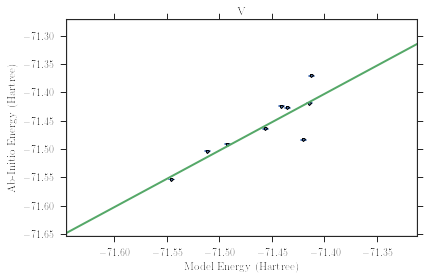

In [152]:
#Produce energy-energy fit plots, forcing certain parameters (see df_generate_force) in the fit by-hand.

tog=pd.load("Data1.pkl")

groups=dater_luc_force.groupby(['atom'])

count=0
pcount=1
evc=27.2114

#f1 = plt.figure(1)
#f2 = plt.figure(2)
#f3 = plt.figure(3)

for name, group in groups:
#  if group['atom'].any()=='V' or group['atom'].any()=='Mn':
#    print('yes')
    
  print(name)
  #  print(group)
  #  x=fit_dataframe(['E0','U','Uprime','J'],group()
  paramers=['Constant','Epsilon','Uprime','J']
  x=fit_dataframe(paramers,group)

  #  print(x)
  #  print('x')
  #  print(x)
  #  print(x,27.2114*res)
  print(group.sort('energy').head(100).to_string())

  cc=0
  for k in paramers:
    print(k)
    print(x[0][cc]*evc)
    cc+=1

  natom = len(group['Constant'])
#  print('Residual (eV)')
#  print(np.sqrt(x[1][0]/natom)*evc)

  E_ab=x[2]
  E_err=x[3]
  E_mod=x[4]

  plt.figure(pcount)
  set=0.1
#  print(E_ab)
#  print(E_mod)

  plt.errorbar(E_mod, E_ab, yerr=E_err, linestyle="",lw=1,marker="o",markersize=3,mew=1)
  plt.plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)

  #plt.plot([-100,-2],[-100,-2],lw=2)
  plt.xlim([np.min(E_mod)-set, np.max(E_mod)+set])
  plt.ylim([np.min(E_ab)-set, np.max(E_ab)+set])

  plt.xlabel("Model Energy (Hartree)")
  plt.ylabel("Ab-Initio Energy (Hartree)")
  plt.title(name)
  plt.gcf().tight_layout()
#  plt.savefig('atomfit'+str(pcount)+'.jpg')
  pcount+=1


  count+=1
    

  #print(group)
  #print(group.corr())
#  if len(group)>=3:
#    print(fit_dataframe(['e','U'],group))
#  if len(group)>=5:
#    print(fit_dataframe(['e','U','Uprime'],group))
#    print(fit_dataframe(['e','U','J','Uprime'],group))
#  print(group)

#plt.tight_layout()

(u'Cr', 3)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
20         1  2.935212 -2.895244   0   3   3  0.001105  3.006798   Cr  2.935212 -86.355270  0.000655
17         1  2.972865 -1.008477   0   3   1  0.004076  2.937660   Cr  2.972865 -86.301106  0.000819
16         1  2.980262 -0.994732   1   3   1  0.969154  2.025396   Cr  2.980262 -86.244576  0.000816
Constant
-2349.11808331
U
2.35738480335
X Range
[-86.428453637559059, -86.22845363755907]
Y Range
[-0.013367750158080477, 0.18663224984191953]
(u'Cr', 4)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
10         1  3.976095 -5.936659   0   4   4  0.023404  6.021929   Cr  3.976095 -86.856092  0.000804
11         1  3.968669 -2.875428   0   4   2  0.010849  5.907844   Cr  3.968669 -86.771255  0.000829
21         1  3.950593 -1.964099   0   4   0  0.024300  5.897068   Cr  3.950593 -86.751986  0.000810
23         1  3.957958 -2.9

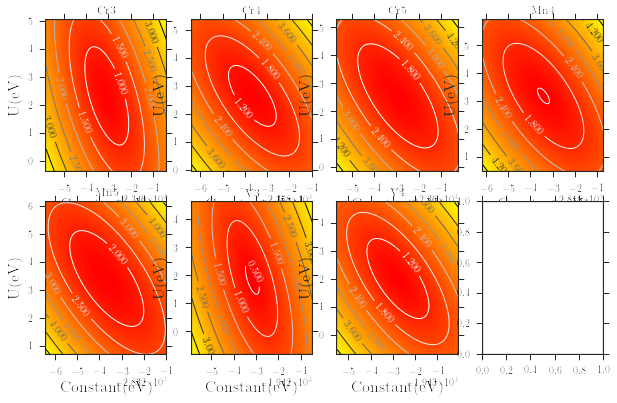

In [49]:
#Produce heat maps

tog=pd.load("Data1.pkl")

groups=dater_luc.groupby(['atom','Ne'])

fig,axes2d=plt.subplots(2,int((len(groups)+1)/2),figsize=(10.,6.))
axes=axes2d.flatten()

count=0
pcount=1
evc=27.2114

#f1 = plt.figure(1)
#f2 = plt.figure(2)
#f3 = plt.figure(3)

for name, group in groups:
#  if group['atom'].any()=='V' or group['atom'].any()=='Mn':
#    print('yes')
    
  print(name)
  #  print(group)
  #  x=fit_dataframe(['E0','U','Uprime','J'],group()
  paramers=['Constant','U']
  x=fit_dataframe(paramers,group)

  #  print(x)
  #  print('x')
  #  print(x)
  #  print(x,27.2114*res)
  print(group.sort('energy').head(100).to_string())

  cc=0
  for k in paramers:
    print(k)
    print(x[0][cc]*evc)
    cc+=1

  natom = len(group['Constant'])
#  print('Residual (eV)')
#  print(np.sqrt(x[1][0]/natom)*evc)

  E_ab=x[2]
  E_err=x[3]
  E_mod=x[4]

  plt.figure(pcount)
  set=0
#  print(E_ab)
#  print(E_mod)

#  plt.errorbar(E_mod, E_ab, yerr=E_err, linestyle="",lw=1,marker="o",markersize=3,mew=1)
#  plt.plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)

  #plt.plot([-100,-2],[-100,-2],lw=2)
#  plt.xlim([np.min(E_mod)-set, np.max(E_mod)+set])
#  plt.ylim([np.min(E_ab)-set, np.max(E_ab)+set])

#  plt.xlabel("Model Energy (Hartree)")
#  plt.ylabel("Ab-Initio Energy (Hartree)")
#  plt.title(name)
#  plt.gcf().tight_layout()
#  plt.savefig('atomfit'+str(pcount)+'.jpg')
  pcount+=1



  plot_pair(x[0],['Constant','U'],group,axes[count],[0,1],[x[0][0]-0.1,x[0][0]+0.1],[x[0][1]-0.1,x[0][1]+0.1])
  axes[count].set_title(name[0]+str(name[1]))
  count+=1
    

  #print(group)
  #print(group.corr())
#  if len(group)>=3:
#    print(fit_dataframe(['e','U'],group))
#  if len(group)>=5:
#    print(fit_dataframe(['e','U','Uprime'],group))
#    print(fit_dataframe(['e','U','J','Uprime'],group))
#  print(group)

#plt.tight_layout()


(u'Cr', 3)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
20         1  2.935212 -2.895244   0   3   3  0.001105  3.006798   Cr  2.935212 -86.355270  0.000655
17         1  2.972865 -1.008477   0   3   1  0.004076  2.937660   Cr  2.972865 -86.301106  0.000819
16         1  2.980262 -0.994732   1   3   1  0.969154  2.025396   Cr  2.980262 -86.244576  0.000816
Constant
-2283.22827256
U
-19.3431754948
Uprime
-22.1491914414
X Range
[-2.7108482288616842, 1.2891517711383158]
Y Range
[-2.8139673607887854, 1.1860326392112146]
(u'Cr', 4)
    Constant   Epsilon         J  Nd  Ne  Sz         U    Uprime atom         e     energy     error
10         1  3.976095 -5.936659   0   4   4  0.023404  6.021929   Cr  3.976095 -86.856092  0.000804
11         1  3.968669 -2.875428   0   4   2  0.010849  5.907844   Cr  3.968669 -86.771255  0.000829
21         1  3.950593 -1.964099   0   4   0  0.024300  5.897068   Cr  3.950593 -86.751986  0.000810
23     

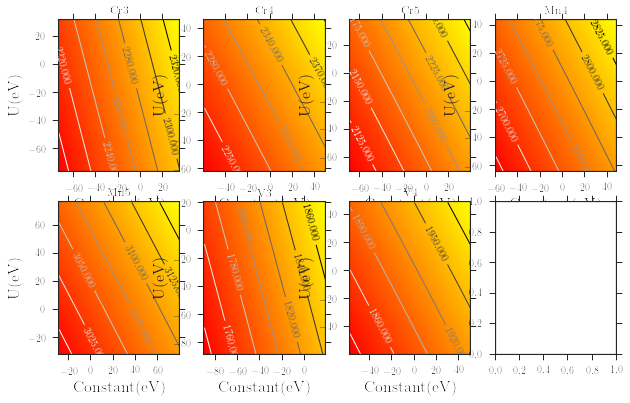

In [51]:
#Produce heat maps

tog=pd.load("Data1.pkl")

groups=dater_luc.groupby(['atom','Ne'])

fig,axes2d=plt.subplots(2,int((len(groups)+1)/2),figsize=(10.,6.))
axes=axes2d.flatten()

count=0
pcount=1
evc=27.2114

#f1 = plt.figure(1)
#f2 = plt.figure(2)
#f3 = plt.figure(3)

for name, group in groups:
#  if group['atom'].any()=='V' or group['atom'].any()=='Mn':
#    print('yes')
    
  print(name)
  #  print(group)
  #  x=fit_dataframe(['E0','U','Uprime','J'],group()

  paramers=['Constant','U','Uprime']
  x=fit_dataframe(paramers,group)

  #  print(x)
  #  print('x')
  #  print(x)
  #  print(x,27.2114*res)
  print(group.sort('energy').head(100).to_string())

  cc=0
  for k in paramers:
    print(k)
    print(x[0][cc]*evc)
    cc+=1

  natom = len(group['Constant'])
#  print('Residual (eV)')
#  print(np.sqrt(x[1][0]/natom)*evc)

  E_ab=x[2]
  E_err=x[3]
  E_mod=x[4]

  plt.figure(pcount)
  set=0
#  print(E_ab)
#  print(E_mod)

#  plt.errorbar(E_mod, E_ab, yerr=E_err, linestyle="",lw=1,marker="o",markersize=3,mew=1)
#  plt.plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)

  #plt.plot([-100,-2],[-100,-2],lw=2)
#  plt.xlim([np.min(E_mod)-set, np.max(E_mod)+set])
#  plt.ylim([np.min(E_ab)-set, np.max(E_ab)+set])

#  plt.xlabel("Model Energy (Hartree)")
#  plt.ylabel("Ab-Initio Energy (Hartree)")
#  plt.title(name)
#  plt.gcf().tight_layout()
#  plt.savefig('atomfit'+str(pcount)+'.jpg')
  pcount+=1


  set=2.0
  plot_pair(x[0],paramers,group,axes[count],[0,1],[x[0][1]-set,x[0][1]+set],[x[0][2]-set,x[0][2]+set])
  axes[count].set_title(name[0]+str(name[1]))
  count+=1
    

  #print(group)
  #print(group.corr())
#  if len(group)>=3:
#    print(fit_dataframe(['e','U'],group))
#  if len(group)>=5:
#    print(fit_dataframe(['e','U','Uprime'],group))
#    print(fit_dataframe(['e','U','J','Uprime'],group))
#  print(group)

#plt.tight_layout()

In [24]:
#Jack-knife routine

print('Start')

tog=pd.load("Data1.pkl")

evc=27.2114

#f0 = plt.figure(0)
#f1 = plt.figure(1)
#f2 = plt.figure(2)

n=9

#togs=tog.reindex(range(0,len(tog['Constant'])))


paramers=['Constant','J']

P   = [[[] for i in range(n)] for t in range(0,len(paramers))]
P_r = [[[] for i in range(n)] for t in range(0,len(paramers))]
hist_param=1

c=0
print("Unrenormalized Results")
groups=dater_luc.groupby(['atom','Ne'])
for name, group in groups:
    print(str(name)+"---------")
#    print(group.head(100).to_string())
#    print(group.drop(group.index[[4]]).head(100).to_string())
    for k in range(0,len(group['Constant'])):
        x=fit_dataframe(paramers,group.drop(group.index[[k]]))
        for g in range(0, len(paramers)):
            P[g][c].append(x[0][g]*evc)
    for t in range(0, len(paramers)):
        print(paramers[t]+" Mean (eV)")
        print(np.mean(P[t][c]))
        print(paramers[t]+" Uncertainty (eV)")
        print(np.std(P[t][c]))    
#    plt.figure(c)
#    print(P[hist_param][c])
#    plt.hist(P[hist_param][c])
#    plt.title(name)
#    plt.xlabel(paramers[hist_param]+' Values (eV)')
    c+=1

#paramers=['Constant','e','U']
#c=0
#print("Renormalized Results, #############################################")
#groups_renorm=tog_renorm.groupby(['atom'])
#for name, group in groups_renorm:
#    print(name)
#    print(group.head(100).to_string())
#    print(group.drop(group.index[[4]]).head(100).to_string())
#    for k in range(0,len(group['Constant'])):
#        x=fit_dataframe(paramers,group.drop(group.index[[k]]))
#        for g in range(0, len(paramers)):
#            P_r[g][c].append(x[0][g]*evc)
#    for t in range(0, len(paramers)):
#        print(paramers[t]+" Mean (eV)")
#        print(np.mean(P_r[t][c]))
#        print(paramers[t]+" Uncertainty (eV)")
#        print(np.std(P_r[t][c]))    
#    plt.figure(c)
#    print(P_r[hist_param][c])
#    plt.hist(P[hist_param][c])
#    plt.title(name)
#    plt.xlabel(paramers[hist_param]+' Values (eV)')
#    c+=1


print('Done')

Start
Unrenormalized Results
(u'Cr', 3)---------
Constant Mean (eV)
-2309.45274509
Constant Uncertainty (eV)
52.2919304525
J Mean (eV)
38.0927533828
J Uncertainty (eV)
52.1992600248
(u'Cr', 4)---------
Constant Mean (eV)
-2356.44607319
Constant Uncertainty (eV)
0.610238622473
J Mean (eV)
1.19342076807
J Uncertainty (eV)
0.120701225398
(u'Cr', 5)---------
Constant Mean (eV)
-2355.8327374
Constant Uncertainty (eV)
0.958909500599
J Mean (eV)
0.987287309641
J Uncertainty (eV)
0.167859835306
(u'Mn', 4)---------
Constant Mean (eV)
-2814.69305396
Constant Uncertainty (eV)
0.78287694382
J Mean (eV)
1.63690516029
J Uncertainty (eV)
0.172640611602
(u'Mn', 5)---------
Constant Mean (eV)
-2826.38389457
Constant Uncertainty (eV)
1.14273401386
J Mean (eV)
1.28673307054
J Uncertainty (eV)
0.185889133341
(u'V', 3)---------
Constant Mean (eV)
-1969.8078121
Constant Uncertainty (eV)
37.7882160766
J Mean (eV)
-24.1375429221
J Uncertainty (eV)
35.3331929388
(u'V', 4)---------
Constant Mean (eV)
-1941.7463

In [44]:
groups=df.groupby(['atom','Ne'])
fig,axes2d=plt.subplots(2,int((len(groups)+1)/2),figsize=(10.,6.))
axes=axes2d.flatten()
count=0
for name, group in groups:
  print(name)
  if len(group)> 4:
    x,res=fit_dataframe(['E0','U','J'],group)
    print(27.2114*x,27.2114*res)
    print(group.sort('energy'))
    plot_pair(x,['E0','U','J'],group,axes[count],[1,2],[x[1]-0.1,x[1]+0.1],[x[2]-0.1,x[2]+0.1])
    axes[count].set_title(name[0]+str(name[1]))
    count+=1

plt.tight_layout()

('Cr', 3)
('Cr', 4)
[ -2.35914900e+03   2.00034335e+00   7.18461062e-01] 0.00973198398159
    E0         J  Nd  Ne  Sz         U    Uprime atom         e     energy  \
10   1 -5.898409   0   4   4  0.023404  5.955944   Cr  3.976095 -86.856092   
11   1 -3.089464   0   4   2  0.010849  5.890795   Cr  3.968669 -86.771255   
21   1 -1.838356   0   4   0  0.024300  5.911453   Cr  3.950593 -86.751986   
23   1 -2.782647   1   4   2  0.984297  2.975652   Cr  3.957958 -86.684692   
9    1 -2.103347   1   4   0  0.991735  4.979037   Cr  3.967939 -86.680358   
15   1 -1.927608   2   4   0  1.965035  2.903722   Cr  3.974263 -86.609841   

       error  
10  0.000804  
11  0.000829  
21  0.000810  
23  0.000804  
9   0.000831  
15  0.000644  
('Cr', 5)
[ -2.35890548e+03   1.68523100e+00   6.33148143e-01] 0.0280499764757
    E0         J  Nd  Ne  Sz         U    Uprime atom         e     energy  \
12   1 -9.755275   0   5   5  0.029671  9.834553   Cr  4.969536 -86.908664   
22   1 -5.893823   0   

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [48]:
#Full-CI calculations on CR

energy =[-86.2699299803, -86.1880572647, -86.1786520079, -86.1757971617, -86.1662262662, -86.1356628684, -86.0472226375, -86.0443677913]
E0     =[1., 1., 1., 1., 1., 1., 1., 1.]
L      =[2., 5., 1., 3., 4., 2., 3., 1.]
S      =[2., 1., 1., 1., 1., 1., 1., 1.]
#dat=json.load(open("cr_data_lucas.json"))

evc=27.2114
keys=['energy','S','s(s+1)','L','l(l+1)', 'Constant', 'Sum']
df={}
for k in keys:
  df[k]=[]

for d in range(0, len(energy)):
  df['energy'].append(energy[d])
  df['S'].append(S[d])
  df['s(s+1)'].append(S[d]*(S[d]+1))
  df['L'].append(L[d])
  df['l(l+1)'].append(L[d]*(L[d]+1))
  df['Sum'].append(S[d]*(S[d]+1)+L[d]*(L[d]+1))
  df['Constant'].append(E0[d])

dat_fit=pd.DataFrame(df)
print(dat_fit.sort('energy').head(100).to_string())

parameters=['Constant','Sum']

nparms=len(parameters)
npts=len(dat_fit)
A=np.zeros((npts,nparms))
for i,p in enumerate(parameters):
  A[:,i]=np.array(dat_fit[p])
K=np.array(dat_fit['energy'])
x,res,rank,s=np.linalg.lstsq(A,K)
K_mod=np.dot(A,x)

E_ab=K
E_mod=K_mod

plt.plot(E_mod, E_ab, linestyle="",lw=1,marker="o",markersize=3,mew=1)
plt.plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)
#plt.plot([-100,-2],[-100,-2],lw=2)
plt.xlim([np.min(E_mod)-set, np.max(E_mod)+set])
plt.ylim([np.min(E_ab)-set, np.max(E_ab)+set])

plt.xlabel("Model Energy (Hartree)")
plt.ylabel("CI Energy (Hartree)")
plt.gcf().tight_layout()

print(parameters[0]+" Parameter (eV)")
print(x[0]*evc)
print(parameters[1]+" Parameter (eV)")
print(x[1]*evc)
print('CI Energy')
print(E_ab)
print('Model Energy')
print(E_mod)

print('Done')

   Constant  L  S  Sum     energy  l(l+1)  s(s+1)
0         1  2  2   12 -86.269930       6       6
1         1  5  1   32 -86.188057      30       2
2         1  1  1    4 -86.178652       2       2
3         1  3  1   14 -86.175797      12       2
4         1  4  1   22 -86.166226      20       2
5         1  2  1    8 -86.135663       6       2
6         1  3  1   14 -86.047223      12       2
7         1  1  1    4 -86.044368       2       2
Constant Parameter (eV)
-2343.42821045
Sum Parameter (eV)
-0.0621107132827
CI Energy
[-86.26992998 -86.18805726 -86.17865201 -86.17579716 -86.16622627
 -86.13566287 -86.04722264 -86.04436779]
Model Energy
[-86.14674508 -86.19239559 -86.12848487 -86.15131013 -86.16957033
 -86.13761498 -86.15131013 -86.12848487]
Done


In [ ]:
#Full-CI calculations on V

energy =[-70.5629535450, -70.4974605496, -70.4971828086, -70.4753518101, -70.4677751755, -70.4098588147, -70.3224641347]
E0     =[1., 1., 1., 1., 1., 1., 1., 1.]
L      =[3., 1., 4., ]
S      =[2., 1., 1., 1., 1., 1., 1., 1.]
#dat=json.load(open("cr_data_lucas.json"))

evc=27.2114
keys=['energy','S','s(s+1)','L','l(l+1)', 'Constant', 'Sum']
df={}
for k in keys:
  df[k]=[]

for d in range(0, len(energy)):
  df['energy'].append(energy[d])
  df['S'].append(S[d])
  df['s(s+1)'].append(S[d]*(S[d]+1))
  df['L'].append(L[d])
  df['l(l+1)'].append(L[d]*(L[d]+1))
  df['Sum'].append(S[d]*(S[d]+1)+L[d]*(L[d]+1))
  df['Constant'].append(E0[d])

dat_fit=pd.DataFrame(df)
print(dat_fit.sort('energy').head(100).to_string())

parameters=['Constant','Sum']

nparms=len(parameters)
npts=len(dat_fit)
A=np.zeros((npts,nparms))
for i,p in enumerate(parameters):
  A[:,i]=np.array(dat_fit[p])
K=np.array(dat_fit['energy'])
x,res,rank,s=np.linalg.lstsq(A,K)
K_mod=np.dot(A,x)

E_ab=K
E_mod=K_mod

plt.plot(E_mod, E_ab, linestyle="",lw=1,marker="o",markersize=3,mew=1)
plt.plot([np.min(E_ab)-set,np.max(E_ab)+set],[np.min(E_ab)-set,np.max(E_ab)+set],lw=2)
#plt.plot([-100,-2],[-100,-2],lw=2)
plt.xlim([np.min(E_mod)-set, np.max(E_mod)+set])
plt.ylim([np.min(E_ab)-set, np.max(E_ab)+set])

plt.xlabel("Model Energy (Hartree)")
plt.ylabel("CI Energy (Hartree)")
plt.gcf().tight_layout()

print(parameters[0]+" Parameter (eV)")
print(x[0]*evc)
print(parameters[1]+" Parameter (eV)")
print(x[1]*evc)
print('CI Energy')
print(E_ab)
print('Model Energy')
print(E_mod)

print('Done')


In [7]:
range(0,8)



[0, 1, 2, 3, 4, 5, 6, 7]